# Описание проекта
Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

# Описание данных

**Данные для первой части**

Файл /datasets/hypothesis.csv:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

Файл /datasets/orders.csv:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth

Читаем файл и сохраняем в переменную

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
#приведем названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
#сброс ограничений на количество символов в записи 
pd.set_option('display.max_colwidth', None)

In [6]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [7]:
hypothesis['ICE'] = round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 2)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [8]:
hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


На первом месте запуск акции, дающей скидку на товар в день рождения:

- у компонентов impact и confidence - почти максимальные показатели, это не удивительно, ведь они отвечают за то насколько изменения повлияет на удвлетворение от продукта и насколько мы можем быть уверены в этом соответственно. Людям нравится получать подарки - это довольно очевидно, поэтому эта гипотеза так выделяется;
- компонет efforts - отвечает за стоимость проведения - он средний, например, запустить собственную службу доставки будет намного дороже.

**Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [9]:
hypothesis['RICE'] = round(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 2)
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [10]:
hypothesis.drop('ICE', axis=1).sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,3.0


На первом месте 7я гипотеза - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок":

- reach - 10 баллов. Добавив форму подписки на все основные страницы - не будет пропущен ни один пользователь, зашедший на сайт
- impact - 7 баллов. Сила влияния изменения метрики на пользователей тоже на уровне.
- сonfidence - 8 баллов. Данная оценка была дана на основе данных эскпеортов и нет никаких оснований ей не доверять, действительно, введение подписки довольно популярно в последние время и показывает положетельное влияние на диджитал продукты
- efforts - 5 баллов. средняя оценка, добавление небольшой формы на сайт не такая большая и сложная задача для разработчиков.

**Как изменилась приоритизация гипотез при применении RICE вместо ICE.**

При расчете RICE в числитель формулы для расчета ICE добавляется дополнительный параметр REACH, который показывает скольких пользователей затронет изменение, которое мы хотим
внести. Соответсвтенно, если добавить форму подписки, то это затронет всех пользователей, а если делать скидку на товар в день рождения, то это затрагивает минимальное количество пользователей. Поэтому изменился порядок сортировки гипотез с изменением метода расчета.

**Вывод**

На примерах, убедились в том, как работает приоритезация гипотез во фрейморках ICE и RICE, есть 1 компонент, который влияет на итоговый показатель обратно попропорционально - это efforts - чем он меньше, тем лучше, все остальные влияеют прямопропционально - это impact, сonfidence и reach(для RICE)

Несмотря на то, что данные методы очень похожи приоритезация гипотезы в зависимости от выбора того или иного, может существенно различаться, если мы ищем гипотезу, которая охватит больший круг пользователей, то выбираем RICE, если этот компонент не так важен или не для каждой гипотезы его можно объективно оценть, то ICE.

## Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача**

 Проанализируйте A/B-тест:
 - Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
 - Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
 - Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
 - Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
 - Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
 - Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
 - Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
 - Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
 - Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
 - Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
 - Примите решение по результатам теста и объясните его. Варианты решений:
  1. Остановить тест, зафиксировать победу одной из групп.
  2. Остановить тест, зафиксировать отсутствие различий между группами.
  3. Продолжить тест.

**Открываем файлы**

In [11]:
orders = pd.read_csv('/datasets/orders.csv')

In [12]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [13]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [14]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Выполним проверку на дубликаты

In [17]:
orders.duplicated().sum()

0

In [18]:
visitors.duplicated().sum()

0

Дубликатов нет

Необходимо изменить тип дынных в столбцах с датами в обеих таблицах, так же перепишем названия столбцов в таблице с заказами в удобную форму.

In [19]:
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')
orders.columns = orders.columns.str.replace('Id', '_id')

In [20]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

Чтобы построить графики, нужно собрать кумулятивные данные.

In [21]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [22]:
datesGroups.head(10)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
66,2019-08-01,B
85,2019-08-22,B
86,2019-08-22,A
124,2019-08-17,A
125,2019-08-17,B


Соберём агрегированные кумулятивные по дням данные о заказах.

In [23]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 
      'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [24]:
ordersAggregated.head(10)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996
499,2019-08-04,A,84,77,425699
498,2019-08-04,B,78,75,489567
698,2019-08-05,A,109,100,549917
699,2019-08-05,B,101,98,581995


Аналогично получим агрегированные кумулятивные по дням данные о посетителях.

In [25]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [26]:
visitorsAggregated.head(10)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803
499,2019-08-04,A,2562
498,2019-08-04,B,2573
698,2019-08-05,A,3318
699,2019-08-05,B,3280


Объявим датафрейм cumulativeData со столбцами:

 - date — дата;
 - group — группа A/B-теста;
 - orders — кумулятивное количество заказов на указанную дату в указанной группе;
 - buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
 - revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
 - visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [27]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [28]:
cumulativeData.head(10)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


Сравним максимальные и минимальные даты датафреймов

In [29]:
print(cumulativeData['date'].max())
print(cumulativeData['date'].min())

2019-08-31 00:00:00
2019-08-01 00:00:00


In [30]:
print(orders['date'].max())
print(orders['date'].min())

2019-08-31 00:00:00
2019-08-01 00:00:00


Построим графики кумулятивной выручки по дням и группам A/B-тестирования.

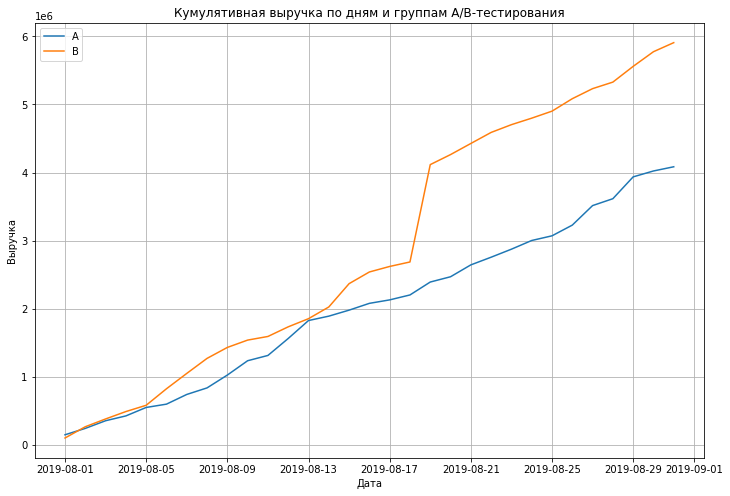

In [31]:
#зададим размеры графика и сетку
plt.figure(figsize=(12,8))
plt.grid(True)

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.show() 

Выручка почти равномерно увеличивается в течение всего теста в обеих группах.
Однако в графике выручки группы В между 17 и 21 августа произошел резкий скачек. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

Чтобы построить графики среднего чека по группам — нужно разделить кумулятивную выручку на кумулятивное число заказов.

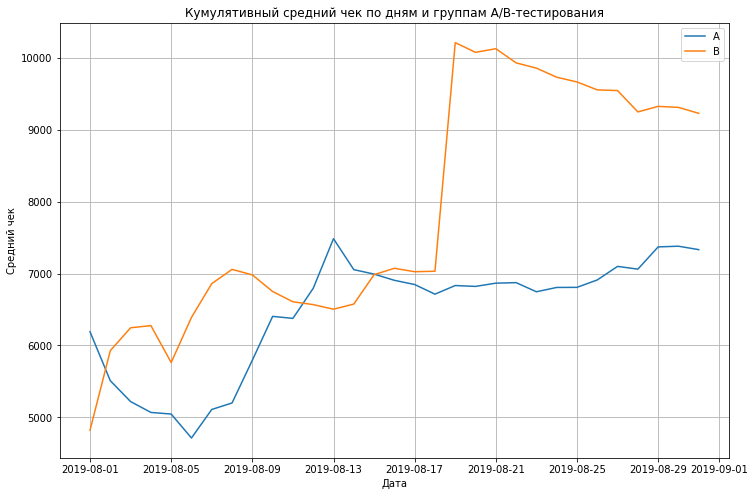

In [32]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.title('Кумулятивный средний чек по дням и группам A/B-тестирования')
plt.show()  

На графиках вначале видны сильные колебания как вверх так и вниз. Между 17 и 21 августа в группе В виден большой всплеск, что подтверждает выводы сделанные по предыдущему графику (графику кумулятивной выручки), за счет этого средний чек в группе В выше чем в группе А. Однако, в конце графика видно, что средний чек в группе А растет, а в группе В падает. 

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

In [33]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

In [34]:
mergedCumulativeRevenue.head(10)

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101
5,2019-08-06,598401,127,824337,129
6,2019-08-07,740818,145,1049671,153
7,2019-08-08,837097,161,1270589,180
8,2019-08-09,1025603,177,1431401,205
9,2019-08-10,1236098,193,1539203,228


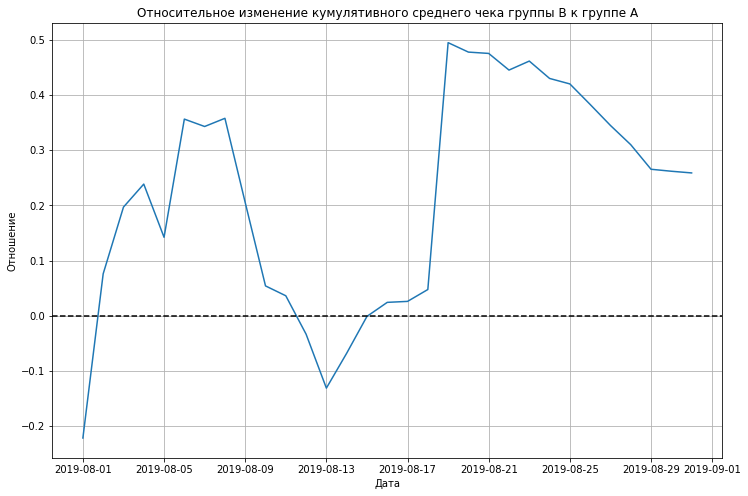

In [35]:
# cтроим отношение средних чеков
plt.figure(figsize=(12,8))
plt.grid(True)
plt.plot(mergedCumulativeRevenue['date'], (
    mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.ylabel('Отношение') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.show()

В нескольких точках график различия между сегментами резко «скачет» и опять наблюдаем всплеск в августе. Очевидно, есть крупные заказы.

### Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

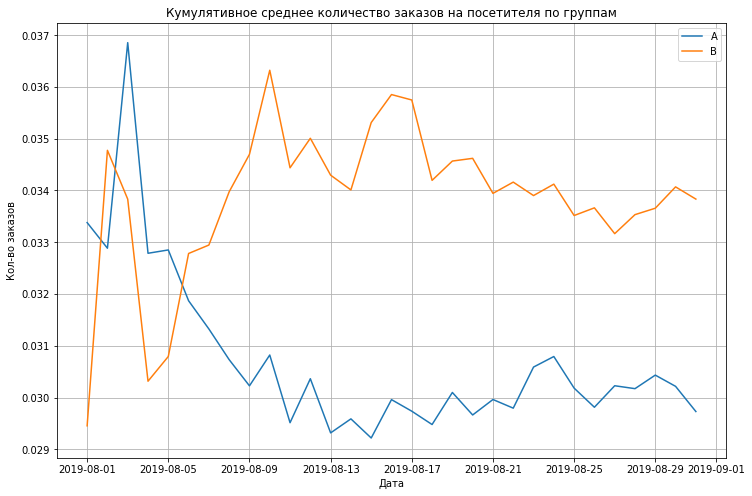

In [36]:
#зададим размеры графика и сетку
plt.figure(figsize=(12,8))
plt.grid(True)

# датафрейм с кумулятивным количеством заказов и кумулятивным кол-ом посетителей по дням в группе А
cumulativeOrdersA = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивным кол-ом посетителей по дням в группе B
cumulativeOrdersB = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]

plt.plot(cumulativeOrdersA['date'], cumulativeOrdersA['orders']/cumulativeOrdersA['visitors'], label='A')
plt.plot(cumulativeOrdersB['date'], cumulativeOrdersB['orders']/cumulativeOrdersB['visitors'], label='B')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Кол-во заказов') 
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.show() 

Вначале кумулятивное среднее количество заказов на посетителя в группе А было выше чем в группе В, но через шесть дней ситуация изменилась и группа В опередила группу А. В итоге, количество средних заказов для группы В зафиксировалось на отметке от 0.33 до 0.34, а для группы А - ниже 0.3

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

In [37]:
# собираем данные в одном датафрейме
mergedCumulativeOrders = cumulativeOrdersA.merge(
    cumulativeOrdersB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

In [38]:
mergedCumulativeOrders.head(10)

,date,visitorsA,ordersA,visitorsB,ordersB
0,2019-08-01,719,24,713,21
1,2019-08-02,1338,44,1294,45
2,2019-08-03,1845,68,1803,61
3,2019-08-04,2562,84,2573,78
4,2019-08-05,3318,109,3280,101
5,2019-08-06,3985,127,3935,129
6,2019-08-07,4629,145,4644,153
7,2019-08-08,5239,161,5298,180
8,2019-08-09,5856,177,5908,205
9,2019-08-10,6262,193,6277,228


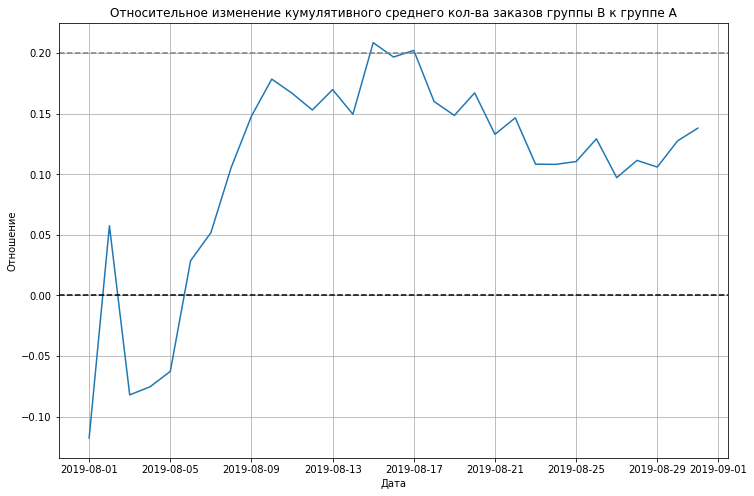

In [39]:
# cтроим отношение кол-ва заказов
plt.figure(figsize=(12,8))
plt.grid(True)
plt.plot(mergedCumulativeOrders['date'], (
    mergedCumulativeOrders['ordersB']/mergedCumulativeOrders['visitorsB'])
         /(mergedCumulativeOrders['ordersA']/mergedCumulativeOrders['visitorsA'])-1)

# добавляем ось X и отметку в 20%
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='gray', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Отношение') 
plt.title('Относительное изменение кумулятивного среднего кол-ва заказов группы B к группе A')
plt.show()

На шестой день теста, получили стабильный прирост, который привысил 20% и установился в пределах от 10 до 15 % к концу периода.

Предварительно гипотеза подтверждается

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

Подсчитаем количество заказов по пользователям и посмотрим на результат

In [40]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['user_id', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Построим точечную диаграмму числа заказов на одного пользователя

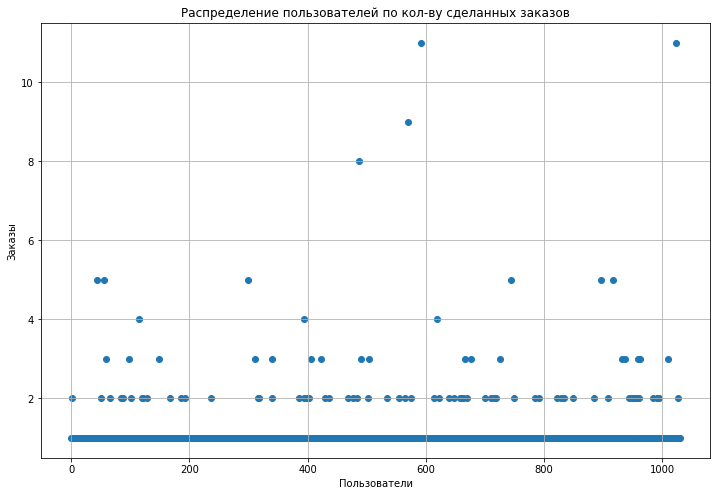

In [41]:
plt.figure(figsize=(12,8))
plt.grid(True)

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

plt.xlabel('Пользователи')
plt.ylabel('Заказы') 
plt.title('Распределение пользователей по кол-ву сделанных заказов')
plt.show()

В основном пользователи делают 1-2 заказа, есть пользователи которые сделали от 3 до 5 заказов. Так же наблюдается явные выбросы от 8 до 11 заказов.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [42]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей оформили более 2-х заказов и не более 1% оформили более 4 заказов. Принято отсеивать от 1% до 5% наблюдений с крайними значениями. Разумно выбрать 3 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

Не более 5% пользователей оформили более 2-х заказов и не более 1% оформили более 4 заказов. Принято отсеивать от 1% до 5% наблюдений с крайними значениями. Разумно выбрать 4 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

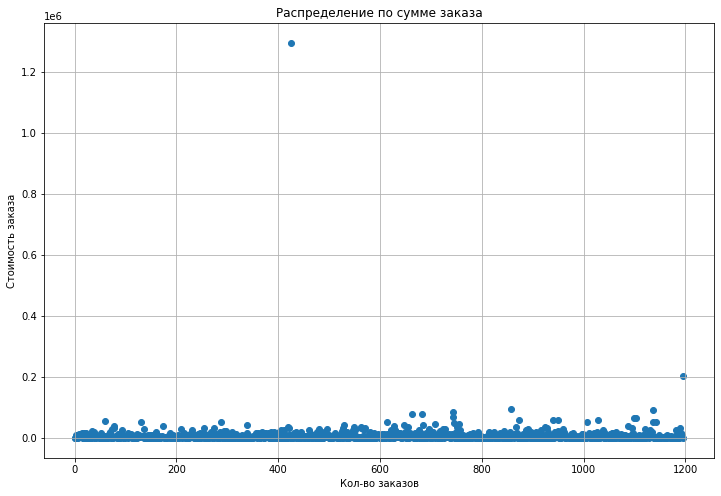

In [43]:
plt.figure(figsize=(12,8))
plt.grid(True)

#серия из чисел от 0 до количества наблюдений в orders
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.ylabel('Стоимость заказа') 
plt.xlabel('Кол-во заказов') 
plt.title('Распределение по сумме заказа') 
plt.show()

На графике видно, что два заказа по стоимости очевидно выбиваются из общего распределения стоимости заказов, поэтому исключим их сразу.

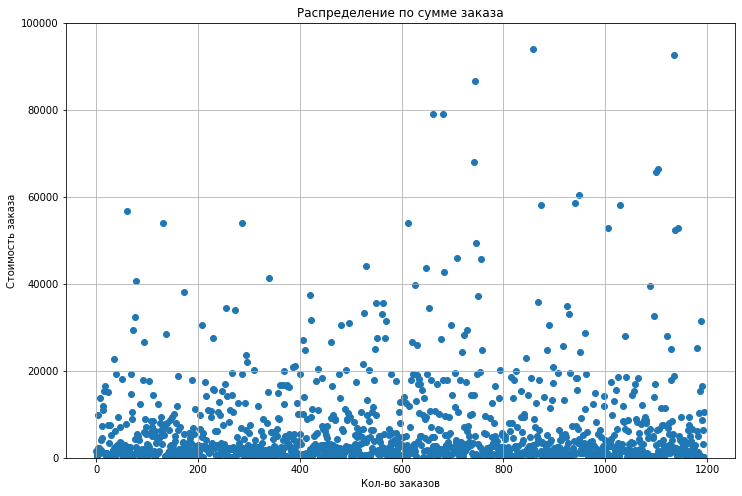

In [44]:
plt.figure(figsize=(12,8))
plt.grid(True)

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

#убираем анамальные заказы 
plt.ylim(0, 100000)

plt.ylabel('Стоимость заказа') 
plt.xlabel('Кол-во заказов') 
plt.title('Распределение по сумме заказа') 
plt.show()

Основная масса заказов лежит в границе до 20000 за заказ, но для того чтобы определить какие заказы можно отсечь, посчитаем процентили.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [45]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Менее 5% заказов имеют сумму более 28000 и менее 1% заказов - 58233. Выбираем границу стоимости заказа в 28000.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

Статистическую значимость различий будем считать с помощью теста Манна-Уитни.

Сформулируем гипотезы. 

Н0: различий в среднем количестве заказов между группами нет. 

Н1: различия в среднем количестве заказов между группами есть.

alpha = 0.05

In [46]:
# таблицы с данными по заказам на каждого пользователя
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id')['transaction_id'].nunique().reset_index()
ordersByUsersA.columns=['user_id','orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id')['transaction_id'].nunique().reset_index()
ordersByUsersB.columns=['user_id','orders']

In [47]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [48]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [49]:
result_1 = st.mannwhitneyu(sampleA, sampleB)[1] 
#задаим значение aplha
alpha = 0.05
#введем значение p-value
print(f'Значение p-value : {result_1}')
# условный оператор с выводом строки с ответом
if result_1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
print('Средняя конверсия группы А: {:.1%}'.format(sampleA.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sampleB.mean()))  
print('Отношение конверсии В к А: {0:.3f}'.format(sampleB.mean()/sampleA.mean()-1)) 

Значение p-value : 0.016792355056752608
Отвергаем нулевую гипотезу
Средняя конверсия группы А: 3.0%
Средняя конверсия группы B: 3.4%
Отношение конверсии В к А: 0.138


In [50]:
result_1 = st.mannwhitneyu(sampleA, sampleB)[1] 
#задаим значение aplha
alpha = 0.05
#введем значение p-value
print(f'Значение p-value : {result_1}')
# условный оператор с выводом строки с ответом
if result_1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Cреднее количество заказов на посетителя группы А: {:.1%}'.format(sampleA.mean()))
print('Cреднее количество заказов на посетителя группы B: {:.1%}'.format(sampleB.mean()))  
print('Отношение среднего количество заказов на посетителя В к А: {0:.3f}'.format(sampleB.mean()/sampleA.mean()-1)) 

Значение p-value : 0.016792355056752608
Отвергаем нулевую гипотезу
Cреднее количество заказов на посетителя группы А: 3.0%
Cреднее количество заказов на посетителя группы B: 3.4%
Отношение среднего количество заказов на посетителя В к А: 0.138


По «сырым» данным есть различия в среднем числе заказов групп A и B. 
p-value = 0.016 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный прирост среднего числа заказов группы B равен 13.8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Сформулируем гипотезы:

Н0: Различий в средних чеках между группами нет

Н1: Различия в средних чеках между группами есть

Коэффициент альфа: 0.05

In [51]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000. Так мы уберём 1% пользователей с наибольшим числом заказов и до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [52]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [53]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['orders'], [99]))]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(ordersByUsers['orders'], [99]))]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [95]))]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным

In [54]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Нулевая гипотеза: Статистически значимых различий в среднем количестве заказов между группами по очищенным данным нет.

Альтернативная гипотеза: Статистически значимые различия в среднем количестве заказов между группами по очищенным данным есть.
    
alpha = 0.05

In [55]:
print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.018
0.145


По "очищенным" данным так же есть различия в среднем числе заказов групп A и B. p-value = 0.018 - меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный прирост среднего числа заказов группы B равен 14.5% - на 1% больще, чем в результате по "сырым" данным.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

Нулевая гипотеза: Статистически значимых различий в среднем чеке заказа между группами по очищенным данным нет.

Альтернативная гипотеза: Статистически значимые различия в среднем чеке заказа между группами по очищенным данным есть.
    
alpha = 0.05

In [56]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.961
-0.014


P-value стал ещё выше, чем в расчетах "сырых" данных и ествественно выше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет как и для "сырых" данных. Однако, средний чек группы B стал незначительно ниже среднего чека группы A после удаления аномалий.

### Решение по результатам теста

Имеющиеся факты:

 - Есть статистически значимое различие по среднему количеству заказов между группами как по «сырым», так и по данным после фильтрации аномалий (в группе В заказов больше);
 - Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий (в группе В средний чек незначительно ниже):
 
Следует продолжить тест, так как необходимо дополнительное время для того, чтобы закрепить итоги теста. Необходимо провести больше наблюдений.

Онлайн калькулятор: http://www.evanmiller.org/ab-testing/sample-size.html

Текущую конверсию можно посчитать по контрольной группе А

In [57]:
#кол-во посетителей в группе А
visitors_a = orders[orders['group']=='A']['visitor_id'].nunique()

#кол-во заказов в группе А
orders_a = orders[orders['group']=='A']['transaction_id'].nunique()

round(orders_a/visitors_a, 3)

1.107

In [58]:
#количество посетителей в обеих выборках
orders['visitor_id'].nunique()


1031

По данным онлайн калькулятора чтобы зафиксировать прирост конверсии, например, в 3% при текущей конверсии в 11.07% и значении статистической силы 80%, нам нужна выборка из 1775 посетителей. В нашем случае 1031 посетитель.

Чтобы определить временные рамки исследования, проще всего это сделать, учитывая кол-во посещений сайта в день. Для этого необходимо разделить размер выборки на количество посещений сайта в день. Полученное число дней и будет периодом проведения эксперимента.

In [59]:
#среднее число посетителей в день
count_visitors_day = (orders.groupby('date')['visitor_id'].nunique()).mean()

#кол-во дней необходимых для эксперимента
round(1775/count_visitors_day)

48

В любом случае тест нельзя проводить менее недели, чтобы исключить влияние внешних (сезонных) факторов (например, в субботу у людей больше свободного времения и они чаще заходят в интернет). В нашем случае эксперимент проводился 30 дней, а по результатам калькулятора необходимо 48, то есть для полноценного значимого результата наш тест необходимо продлить минимум на 18 дней.

<div class="alert alert-info">
    
Имеющиеся факты:

 - Есть статистически значимое различие по среднему количеству заказов между группами как по «сырым», так и по данным после фильтрации аномалий (в группе В заказов больше);
 - Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий (в группе В средний чек незначительно ниже):
 
Исходя из обнаруженных фактов, тест следует остановить, признать его успешным 
</div>
